# Trustii Data Challenge 
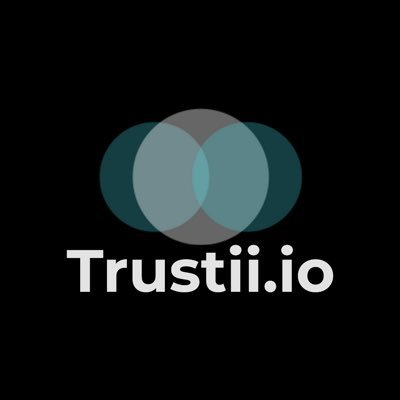

## Contexte :
Dans les hôpitaux, les traitements médicaux et les chirurgies peuvent être classés en procédures hospitalières et ambulatoires. Pour les patients, il est important de comprendre la différence entre ces deux types de soins, car ils impactent la durée de séjour d'un patient dans un établissement médical et le coût d'une procédure.

La différence entre les soins hospitaliers et ambulatoires est la durée pendant laquelle un patient doit rester dans l'établissement où il subit la procédure.

Les soins aux patients hospitalisés nécessitent une hospitalisation de nuit. Les patients doivent rester dans l'établissement médical où leur intervention a été effectuée (qui est généralement un hôpital) pendant au moins une nuit. Pendant ce temps, ils restent sous la surveillance d'une infirmière ou d'un médecin.

Les patients recevant des soins ambulatoires n'ont pas besoin de passer une nuit à l'hôpital. Ils sont libres de quitter l'hôpital une fois l'intervention terminée. Dans certains cas exceptionnels, ils doivent attendre que l'anesthésie se dissipe ou s'assurer qu'il n'y a pas de complications. Tant qu'il n'y a pas de complications graves, les patients n'ont pas à passer la nuit sous surveillance.

## Notre Mission
Appliquer les méthodes d'apprentissage automatique, pour aider à prédire et estimer si un patient doit être classé en tant que patient hospitalier ou patient ambulatoire à l'aide de plusieurs points de données sur les patients, leurs conditions et les tests de laboratoire.

L'ensemble de données sont collectées auprès d'un hôpital privé en Indonésie. Il contient les résultats des tests de laboratoire du patient utilisés pour déterminer le prochain traitement du patient, qu'il soit en soins hospitaliers ou en soins ambulatoires.

# Description du Data
L'ensemble de données est la prévision des dossiers de santé électroniques collectée auprès d'un hôpital privé en Indonésie. Il contient les résultats des tests de laboratoire des patients utilisés pour déterminer le prochain traitement du patient, qu'il soit en soins ou en soins ambulatoires. La tâche intégrée à l'ensemble de données est prédiction de classement.
Source: Le dataset a été téléchargé à partir de Mendeley Data.
link:"https://data.mendeley.com/datasets/7kv3rctx7m/1"
<ol>
<li> HAEMATOCRIT : Patient laboratory test result of haematocrit </li>

<li> HAEMOGLOBINS : Patient laboratory test result of haemoglobins </li>

<li>ERYTHROCYTE : Patient laboratory test result of erythrocyte </li>

<li>LEUCOCYTE : Patient laboratory test result of leucocyte</li>

<li>THROMBOCYTE : Patient laboratory test result of thrombocyte </li>

<li>MCH : Patient laboratory test result of MCH</li>

<li>MCHC : Patient laboratory test result of MCHC</li>

<li>MCV : Patient laboratory test result of MCV</li>

<li>AGE : Patient age </li>

<li>SEX : Patient gender</li>

<li>SOURCE : Target ( Binary :in/out )</li>
</ol>


 # L'analyse exploratoire des données

In [7]:
# Affichage de no données
import pandas as pd
df = pd.read_csv("trustii/train.csv",index_col=False)
df.head(5)

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         37.1          12.2         4.16       16.7          299  29.3  32.9   
1         35.9          12.4         4.12       11.8          152  30.1  34.5   
2         30.8          11.5         4.05       34.9          523  28.4  37.3   
3         41.3          13.9         4.54       10.6          284  30.6  33.7   
4         37.3          11.9         4.00        5.9          196  29.8  31.9   

    MCV  AGE SEX  SOURCE  
0  89.2   47   F       1  
1  87.1   60   M       1  
2  76.0   66   M       0  
3  91.0   71   M       0  
4  93.3   66   F       0

### Taille des données

In [8]:
df.shape

(2316, 11)

### Les valeurs manquante

In [10]:
df.isna().mean().to_frame(name='Manquante %')

Manquante %
HAEMATOCRIT           0.0
HAEMOGLOBINS          0.0
ERYTHROCYTE           0.0
LEUCOCYTE             0.0
THROMBOCYTE           0.0
MCH                   0.0
MCHC                  0.0
MCV                   0.0
AGE                   0.0
SEX                   0.0
SOURCE                0.0

### Les valeurs uniques

In [11]:
df.nunique().to_frame(name='# of unique values')

# of unique values
HAEMATOCRIT                  291
HAEMOGLOBINS                 114
ERYTHROCYTE                  369
LEUCOCYTE                    241
THROMBOCYTE                  483
MCH                          166
MCHC                          94
MCV                          360
AGE                           94
SEX                            2
SOURCE                         2

### Description des données

In [12]:
df.describe()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  2316.000000   2316.000000  2316.000000  2316.000000  2316.000000   
mean     38.230915     12.755872     4.534693     8.823964   258.630397   
std       5.868669      2.043026     0.765682     5.164134   113.151771   
min      18.800000      5.800000     1.930000     1.100000    10.000000   
25%      34.300000     11.400000     4.030000     5.600000   189.000000   
50%      38.600000     12.900000     4.560000     7.600000   258.000000   
75%      42.425000     14.200000     5.030000    10.500000   322.000000   
max      69.000000     18.800000     7.860000    76.600000   910.000000   

               MCH         MCHC          MCV          AGE       SOURCE  
count  2316.000000  2316.000000  2316.000000  2316.000000  2316.000000  
mean     28.305268    33.356434    84.786226    46.805699     0.398100  
std       2.688948     1.228086     6.884380    21.761108     0.489612  
min      15.500000    26.100000    54.100000     1.000000     0.000000  
25%      27.300000    32.700000    81.800000    29.000000     0.000000  
50%      28.800000    33.400000    85.450000    48.000000     0.000000  
75%      29.900000    34.100000    88.900000    64.000000     1.000000  
max      40.800000    38.100000   115.600000    98.000000     1.000000

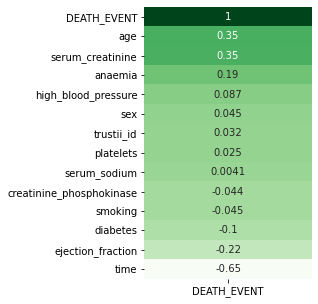

In [3]:
corr_matt = df.corr(method='pearson')[['DEATH_EVENT']].sort_values(by='DEATH_EVENT',ascending=False)
plt.figure(figsize=(3,5))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

In [3]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
components = pca.fit_transform(df[num_features])

total_var = pca.explained_variance_ratio_.sum() * 100

# fig = px.scatter_3d(
#     components, x=0, y=1, z=2, color=y,
#     title=f'Total Explained Variance: {total_var:.2f}%',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.show()
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=y
)
fig.update_traces(diagonal_visible=False)
fig.show()


NameError: name 'num_features' is not defined

### Importation des modules

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import numpy as np
# for Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



In [4]:
import pandas as pd
# Lire notre data d'entrainement d'après le fichier csv train.csv
df = pd.read_csv("trustii/train.csv",index_col=False)
df.head(20)
"""Fonction preProcessing sert à transformer les valeurs de la  colonne SEX (F,M) par (1,0) respectivement

    Parameters
    ----------
    df : Dataframe

    Returns
    -------
    X: dataframe nos données sont la colonne SOURCE
    y:c'est la colonne des étiquettes(target)
    num_features:se sont les features (colonnes) numérique
    """
def preProcessing(df):
    y = df['SOURCE']
    X = df
    X = X.drop(columns = "SOURCE")
    num_features = X.select_dtypes([np.number]).columns
    X["SEX"] = X.SEX.replace({'F':1,'M':0})
#     X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1, stratify=y)
    return X,y,num_features
"""Fonction scaler_fct sert pour scaler notre data selon plusieur scaler

    Parameters
    ----------
    df : Dataframe 
    numScaler: indice de chaque scaler ex:si je veux scaler en utilisant RobustScaler donc scaler_fct(2)

    Returns
    -------
    df: dataframe qui a été scaler par un scaler de sklearn
    """
def scaler_fct(df,numScaler):
    if numScaler not in range(1,6):
        print("number does not exist")
    if(numScaler == 1):
        scaler = StandardScaler()
        df =scaler.fit_transform(df)
        return df
        
    if(numScaler == 2):
        scaler = RobustScaler()
        df = scaler.fit_transform(df)
        return df
    if(numScaler == 3):
        scaler = MinMaxScaler((-1,1))
        df =scaler.fit_transform(df)
        return df
    if(numScaler == 4):
        scaler = MaxAbsScaler()
        df =scaler.fit_transform(df)
        return df
    if(numScaler == 5):
        scaler = PowerTransformer(method='yeo-johnson', standardize=True)
        df =scaler.fit_transform(df)
        return df
    if(numScaler == 6):
        scaler = QuantileTransformer(n_quantiles=10, random_state=0)
        df =scaler.fit_transform(df)
        return df
                                #
"""Fonction boxplots sert pour visualiser nos données surtout numérique et qui nous aide pour étudier 
la distribution de nos données et identifier les outliers


    Parameters
    ----------
    df : Dataframe 
    num_features:list ,se sont les features (colonnes) numérique 

    Returns
    -------
    Affichage des boxplots pour chaque feature de num_features
    """
def boxplots(df,num_features):
    fig, axes = plt.subplots(9, 1, figsize=(8, 25))
    plt.subplots_adjust(hspace = 0.8)
    for i, c in enumerate(num_features):
        sns.boxplot(ax=axes[i],x=df[c])
"""Fonction scatter sert dessiner des pair plot


    Parameters
    ----------
    df : Dataframe 
    target:colonne but dans notre cas target ="source" 

    Returns
    -------
    Affichage des pairplots
    """
def scatter(df,target):
    sns.pairplot(df, hue = target)

In [6]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsClassifier(n_neighbors=2)))
    level0.append(('baggingKNN', BaggingClassifier(KNeighborsClassifier(n_neighbors=2),
                                bootstrap=True, 
                                n_estimators=500,
                                max_samples=400,
                                random_state=46)))
    level0.append(('svm', SVC(C= 10, gamma= 0.1, kernel= 'rbf')))
    level0.append(('baggingSVM',BaggingClassifier(SVC(gamma=1,probability=True, random_state=46),
                                bootstrap=True, 
                                n_estimators=300,
                                max_samples=500,
                                random_state=46)))
    level0.append(('XGB',XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [15]:
# get a stacking ensemble of models
def get_stacking2():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsClassifier(n_neighbors=2)))
    level0.append(('dt',DecisionTreeClassifier(max_depth=4)))
    level0.append(('baggingKNN', BaggingClassifier(KNeighborsClassifier(n_neighbors=2),
                                bootstrap=True, 
                                n_estimators=500,
                                max_samples=400,
                                random_state=46)))
    level0.append(('svm', SVC(C= 10, gamma= 0.1, kernel= 'rbf',probability=True)))
#     level0.append(('baggingSVM',BaggingClassifier(SVC(gamma=1,probability=True, random_state=46),
#                                 bootstrap=True, 
#                                 n_estimators=300,
#                                 max_samples=500,
#                                 random_state=46)))
#     level0.append(('XGB',XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                     silent=True, nthread=1)))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [5]:
#appel de la fonction preProcessing
X,y,num_features = preProcessing(df)

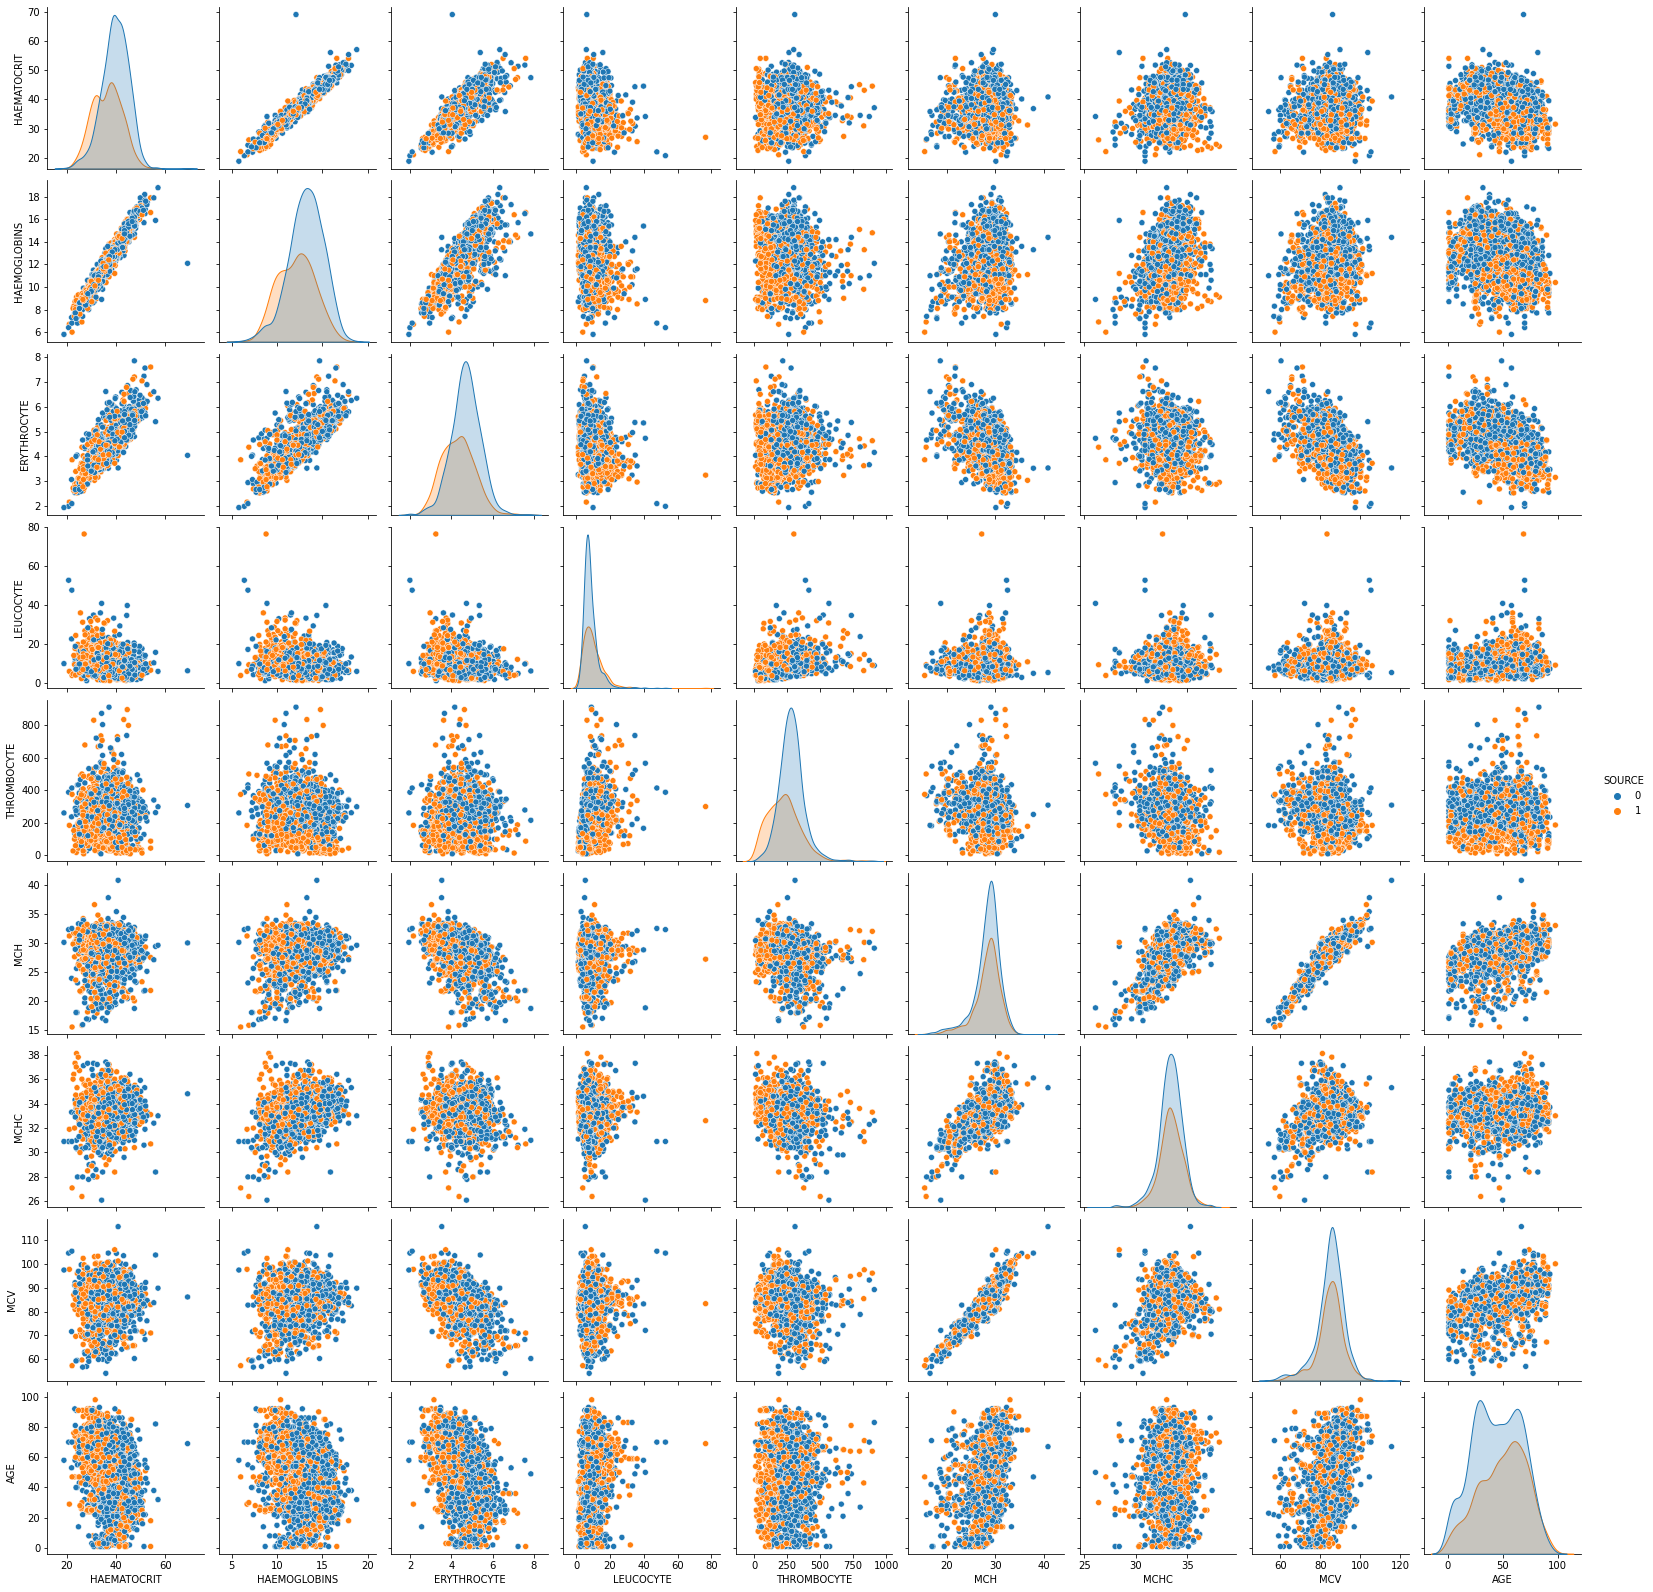

In [18]:
#Pair Plot selon la colonne 'SOURCE'
scatter(df,'SOURCE')

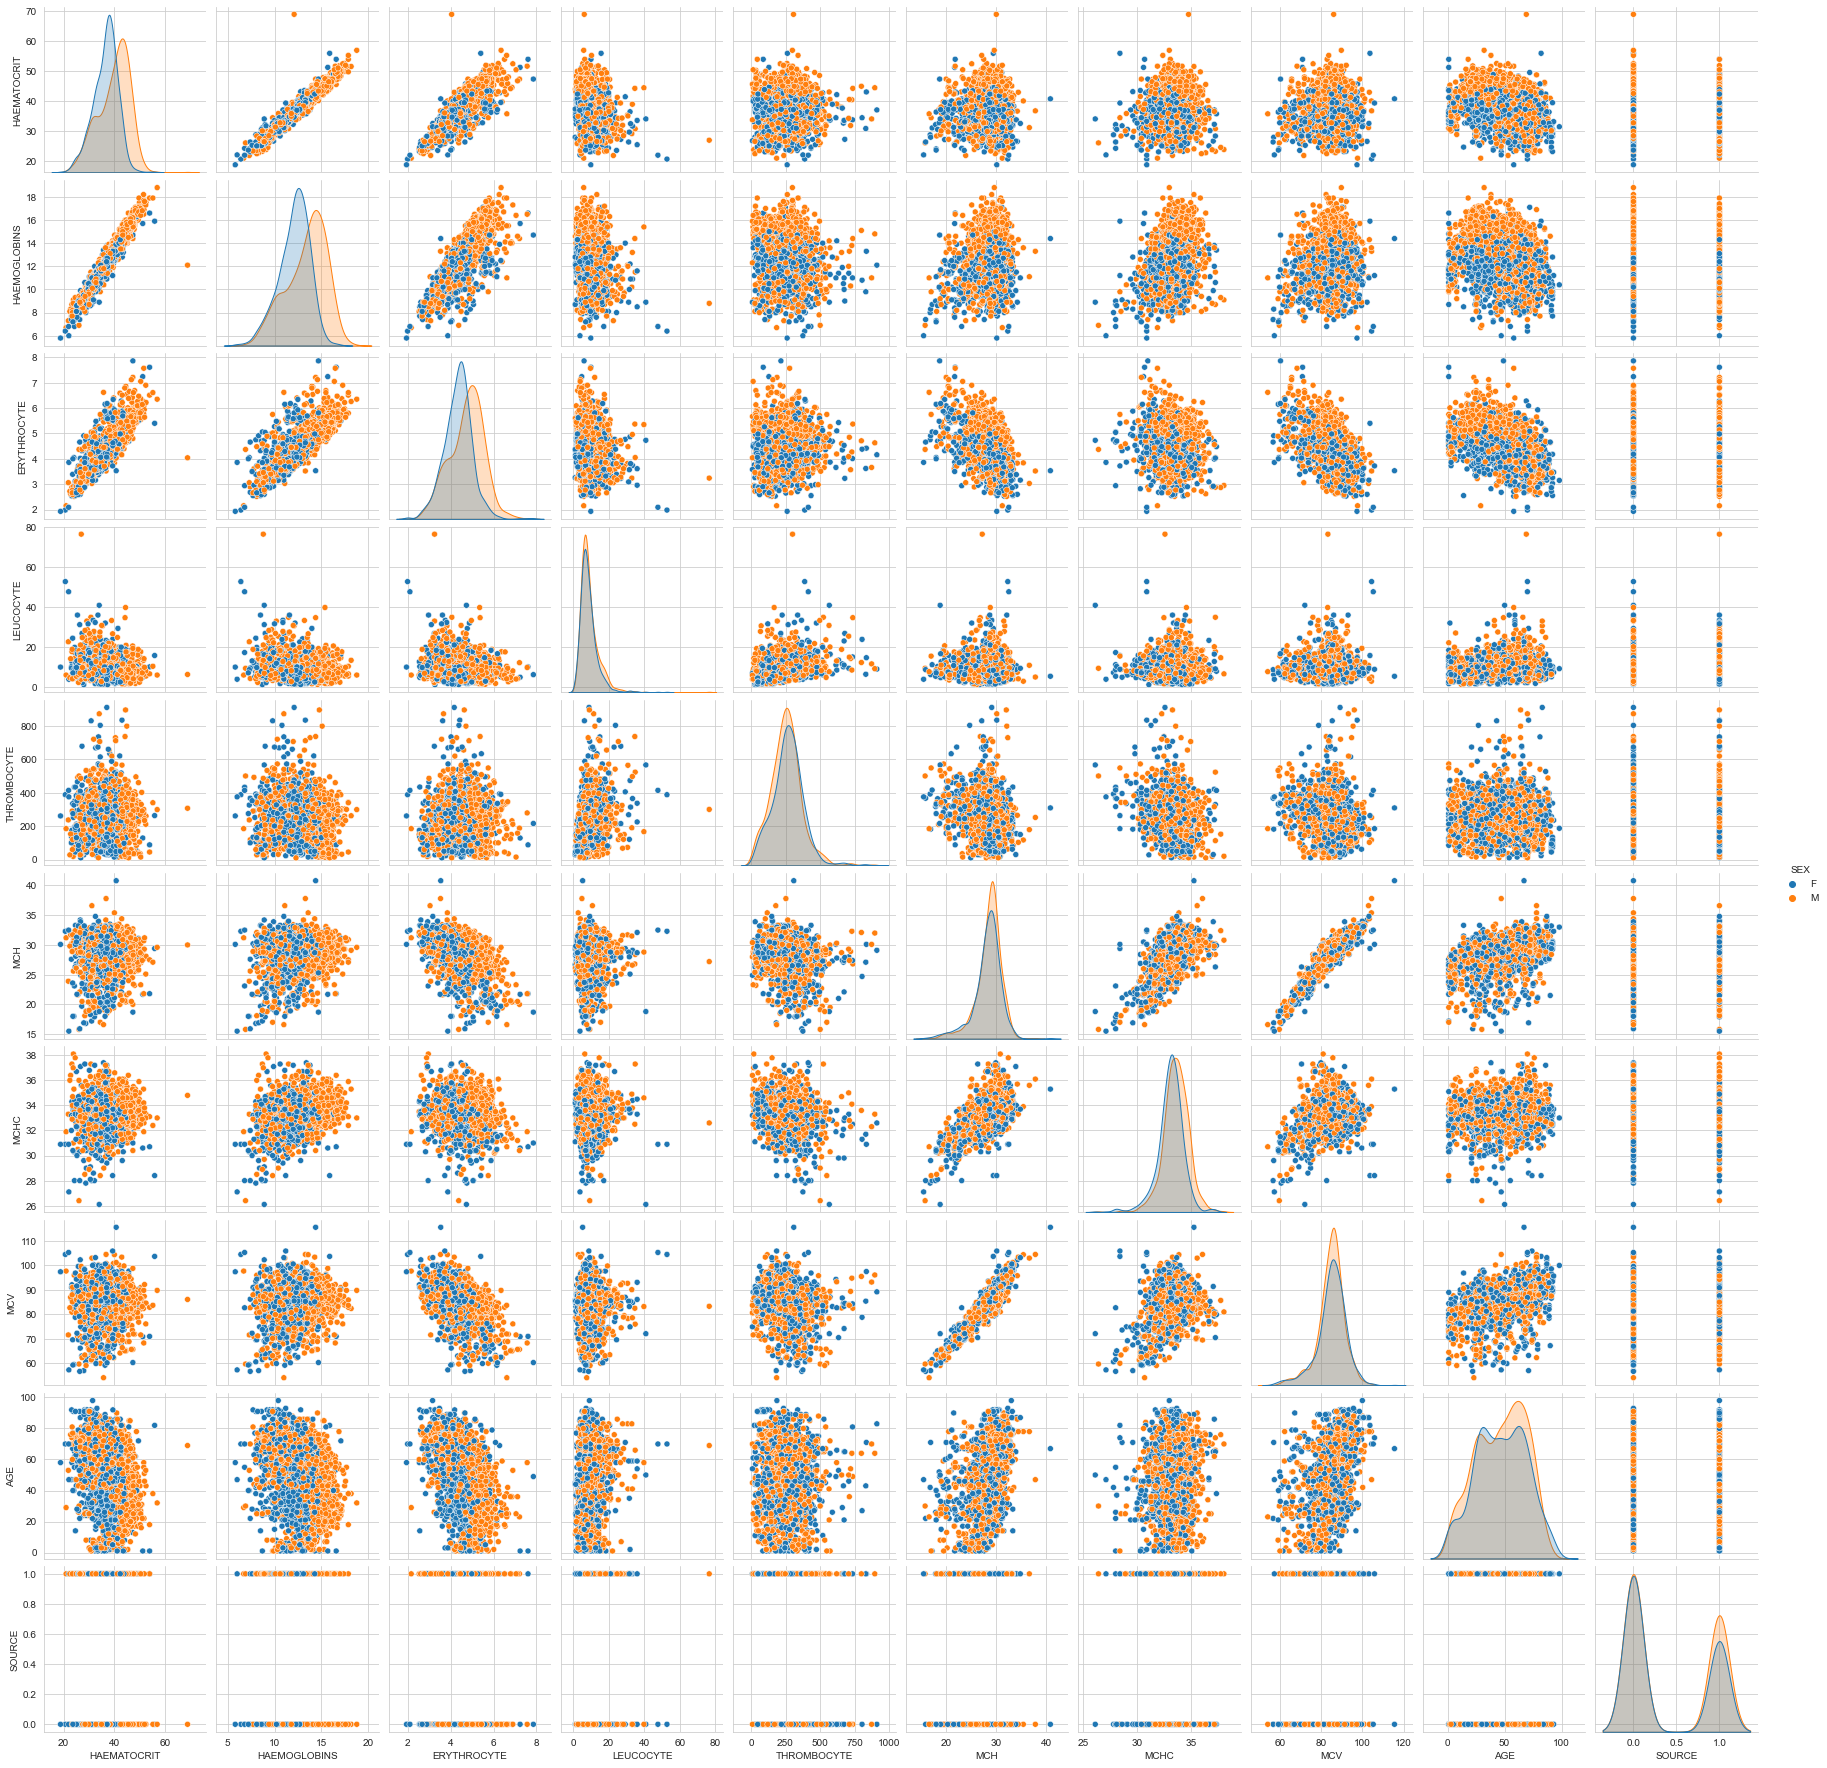

In [129]:
#Pair Plot selon la colonne 'Sex'
scatter(df,'SEX')

### Box plots

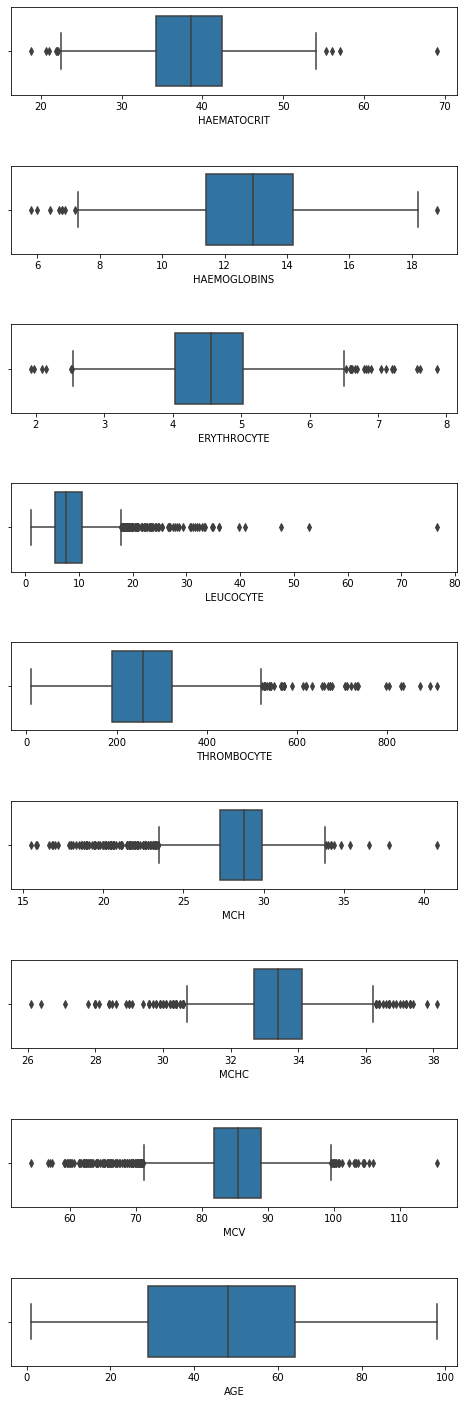

In [5]:
boxplots(X,num_features)

#### Remarque
<ul>
    <li>existence des outliers qui augmente la variance d'erreur et réduit la puissance des tests statistiques.</li>
    <li>La plupart des features suivent la distribution gaussienne (symétrique) </li>
    </ul>

### Removing Outliers

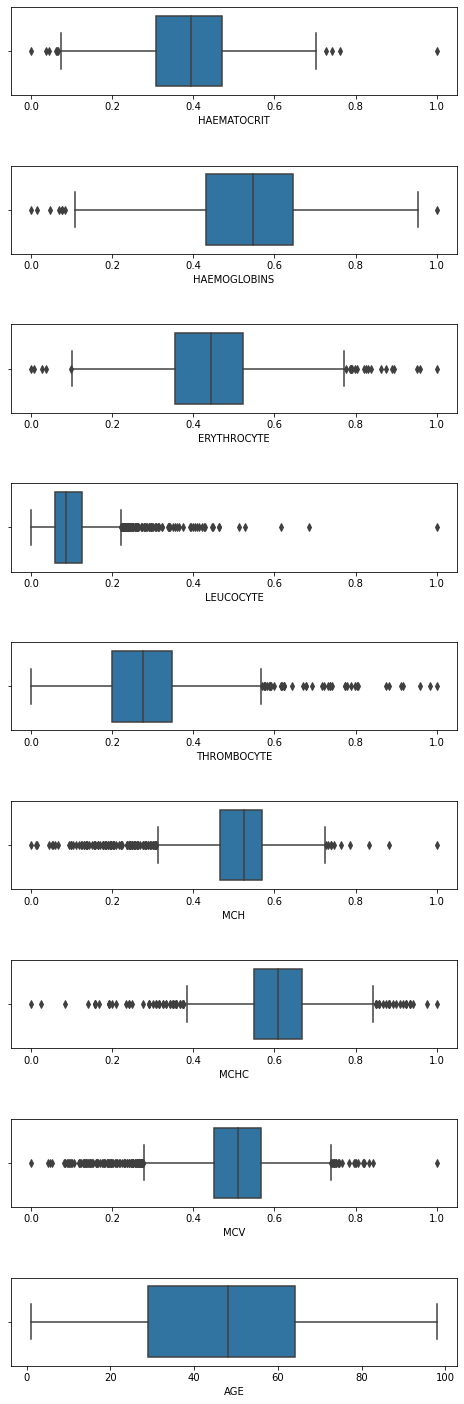

In [28]:
#puisque la colonne AGE ne continet pas de outliers essayons d'applique un scaler par exemple MinMaxScaler pour enlever les outliers
df_outliers = df[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV']]
df_scaled = scaler_fct(df,3)
df_scaled = pd.DataFrame(df_scaled, columns=['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV'])
df_scaled = pd.concat([df_scaled,df['AGE']],axis=1) 
boxplots(df_scaled,num_features)

#### Remarque
<ul>
    <li>en remarque un petit changement par rapport les outliers le nombre est diminue</li>
    
  </ul>

# Enlever les Outliers en utilisant la méthode Zscore
le Zscore décrit la position d'un score brut en termes de distance par rapport à la moyenne, lorsqu'il est mesuré en unités d'écart type. Le score z est positif si la valeur se situe au-dessus de la moyenne et négatif si elle se situe en dessous de la moyenne.
la formule est la suivante:
$z = (x-\mu)/\sigma$

In [6]:
from scipy import stats
df_zscore = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(df.shape)
print(df_zscore.shape)

(2316, 11)
(2185, 11)


#### Remarque
<ul>
    <li>on remarque une dimunation de 131 </li>
</ul>

# Enlever les Outliers en utilisant la méthode de  IQR
l’écart interquartile ou IQR) est une mesure de dispersion qui s'obtient en faisant la différence entre le troisième et le premier quartile :
$IQR = Q_3-Q_1$

<ipython-input-6-d81b09140025>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_q = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-6-d81b09140025>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_q = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


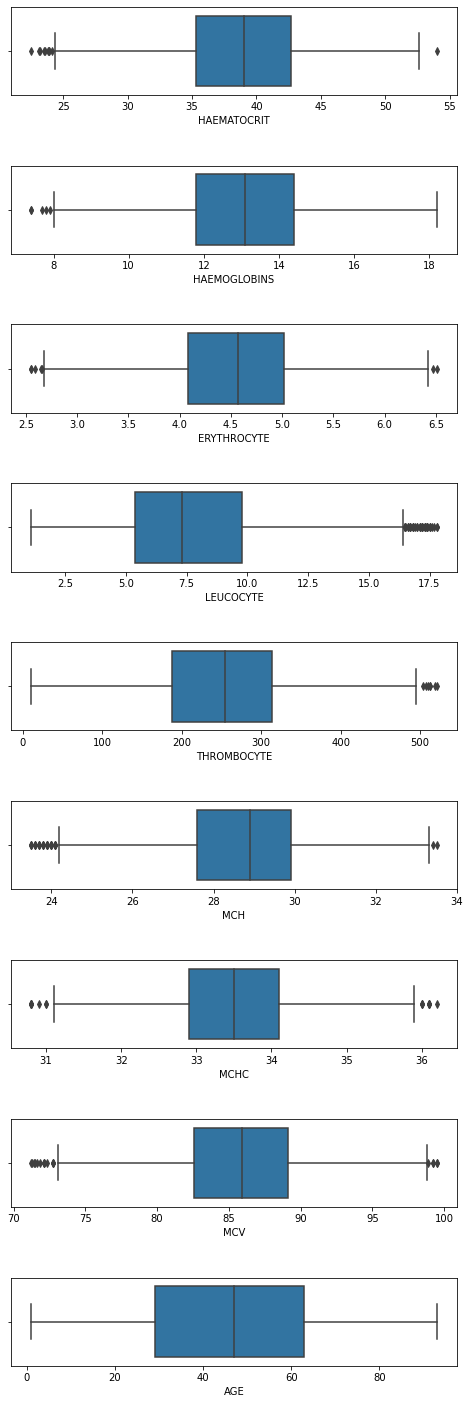

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_q = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
boxplots(df_q,num_features)

#### Remarque
<ul>
    <li>en remarque que la distribution devient plus normalisé</li>
    <li>Enlever les outliers est trés utile lorsqu'on parle des données de taille énorme</li>
    <li>Après avoir essayer des données sans outliers j'ai remarqué que la précision devient de plus au plus mauvaise </li>
    <li>si vous le faisiez(enlever les outliers), supprimeraient des points de données parfaitement valides.</li>
    <p>Supprimer les valeurs aberrantes sans une bonne raison de supprimer les valeurs aberrantes fait rarement du bien à quelqu'un. Sans une compréhension approfondie et acquise de ce que les plages possibles existent dans chaque fonctionnalité, la suppression des valeurs aberrantes devient délicate.</p>
  </ul>

In [9]:
X.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX'],
      dtype='object')

In [5]:
X[[ 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE','MCH', 'MCHC', 'MCV']] = scaler(X[[ 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE','MCH', 'MCHC', 'MCV']],2)

In [146]:
X.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE       MCH  \
0         37.1          12.2        -0.40   1.857143     0.308271  0.192308   
1         35.9          12.4        -0.44   0.857143    -0.796992  0.500000   
2         30.8          11.5        -0.51   5.571429     1.992481 -0.153846   
3         41.3          13.9        -0.02   0.612245     0.195489  0.692308   
4         37.3          11.9        -0.56  -0.346939    -0.466165  0.384615   

       MCHC       MCV  AGE  SEX  
0 -0.357143  0.528169   47    1  
1  0.785714  0.232394   60    0  
2  2.785714 -1.330986   66    0  
3  0.214286  0.781690   71    0  
4 -1.071429  1.105634   66    1

In [133]:
df.head()

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE'],
      dtype='object')

## Visualisations

<AxesSubplot:xlabel='SEX', ylabel='Count'>

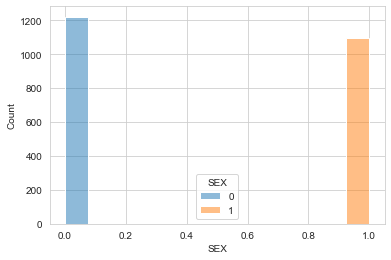

In [147]:
sns.histplot(data=X, x="SEX",hue="SEX")

#### Remarque 
on remarque que le nombre des hommes est plus grand 

<AxesSubplot:xlabel='SOURCE', ylabel='Count'>

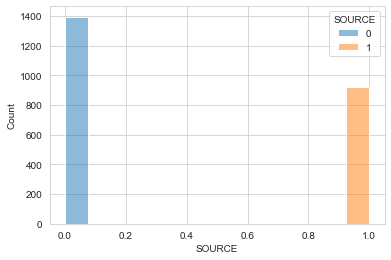

In [148]:
sns.histplot(data=df, x="SOURCE",hue="SOURCE")

#### Remarque 
on remarque que les samples qui ont la catégorie 0 sont plus que la catégorie 1 ,donc lors d'entrainement de notre modèle 
on a besion de deux choses:
<ul>
    <li>ajouter de nouveau data de catégorie 1</li>
    <li>supprimer des samples de catégorie 0</li>
</ul>

In [36]:
num_features = X_train.select_dtypes([np.number]).columns
num_features

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'AGE', 'SEX'],
      dtype='object')

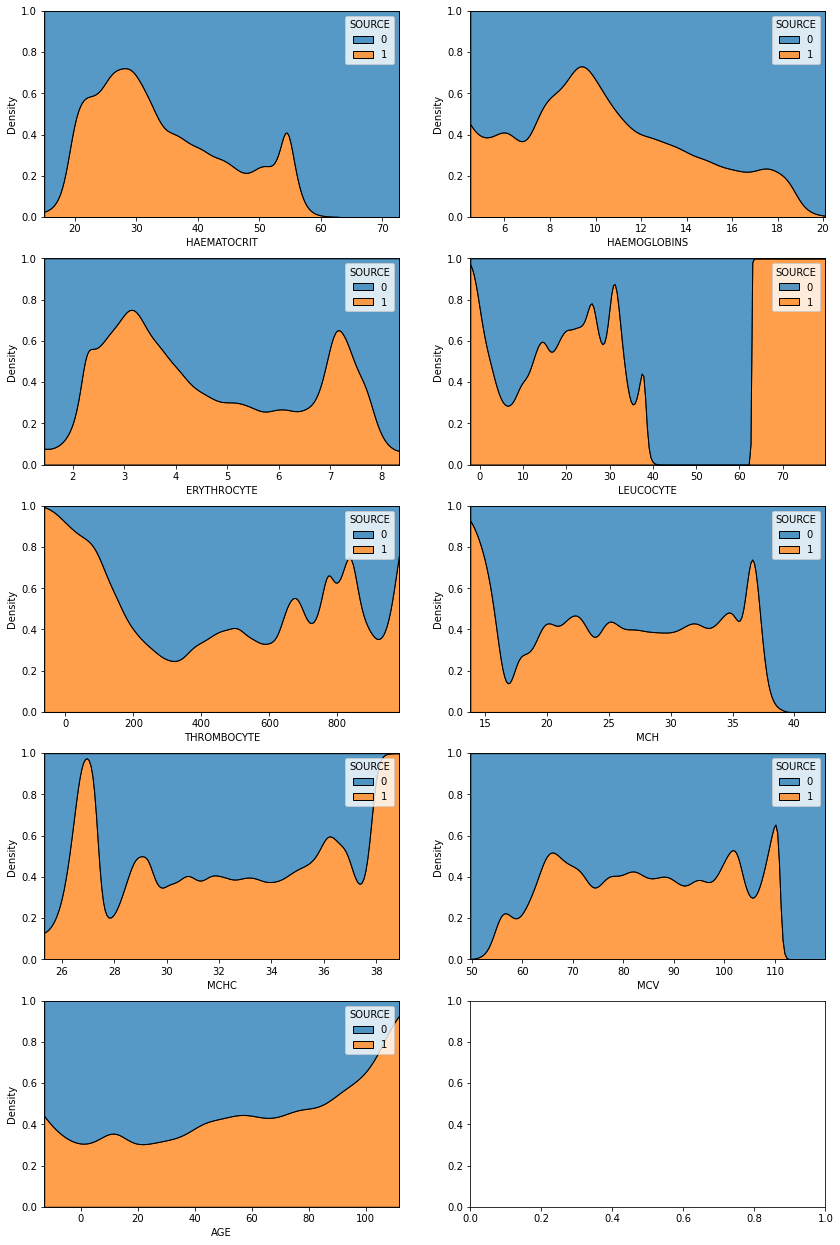

In [6]:
# KDEplot pour chaque feature numérique
fig, axes = plt.subplots(5,2, figsize=(14,22))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(df[num_features]):
    plot = sns.kdeplot(data=df, x=c, hue='SOURCE', multiple='fill', ax=axes[i])

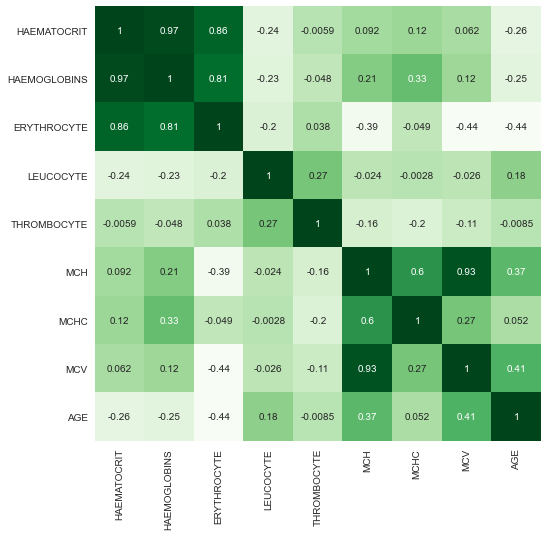

In [131]:
# Correlation des features

corr_matt = df[num_features].corr(method='pearson')
plt.figure(figsize=(8,8))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

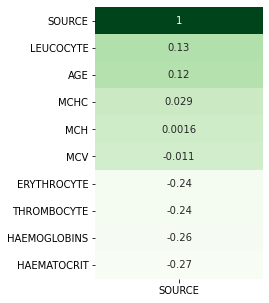

In [20]:

corr_matt = df.corr(method='pearson')[['SOURCE']].sort_values(by='SOURCE',ascending=False)
plt.figure(figsize=(3,5))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

#### Observations:

LEUCOCYTE et AGE sont corrélé postivement avec SOURCE
THROMBOCYTE, ERYTHROCYTE, HAEMOGLOBINS , HAEMATOCRIT sont corrélé négativement avec la SOURCE
aucune corrélation de  MCHC, MCH, MCV, avec SOURCE

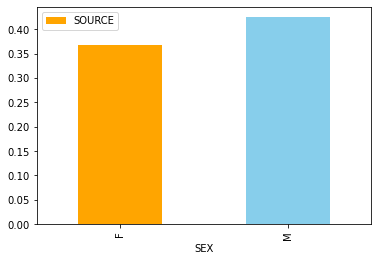

In [78]:
df = df.groupby('SEX')["SOURCE"].mean().to_frame().reset_index()
plot = df.plot(kind='bar', x='SEX', y='SOURCE', color=('orange', 'skyblue'))

#### remarque
on remarque les hommes sont plus d'être de la classe 1

In [19]:
X.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)
# X_test.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)

In [20]:
X.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  AGE  SEX
0         37.1          12.2         4.16       16.7          299   47    1
1         35.9          12.4         4.12       11.8          152   60    0
3         41.3          13.9         4.54       10.6          284   71    0
4         37.3          11.9         4.00        5.9          196   66    1
5         38.7          12.8         4.22        4.4          204   64    0

# Entrainement Machine Learning

In [159]:
testing_df = pd.read_csv('trustii/test.csv', encoding='utf-8', index_col="trustii_id")
"""Fonction preProcessingTest sert de encoder la colonne sex

    Parameters
    ----------
    df : Dataframe cette fois il s'agit de données de validation

    Returns
    -------
    df: dataframe
    """
def preProcessingTest(df):
    df["SEX"] = df.SEX.replace({'F':1,'M':0})
    return df
X_testt = preProcessingTest(testing_df)
X_valid = X_testt.copy()
X_testt.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)

"""Fonction deploy2 sert d'ajouter la colonne SOURCE qui vient de l'appel d'un modèle de machine learning

    Parameters
    ----------
    predictions:list des 0 et des 1
    testing_df : Dataframe de validation
    title:le nom de fichier csv
    save:True ou False

    Returns
    -------
    ajouter la colonne SOURCE à les données de validation et enregistrer le fichier csv pour le local
    """
def deploy2(predictions, testing_df, title, save):
    testing_df["SOURCE"] = predictions
    print(testing_df.head())
    if save:
        testing_df.to_csv(  title , index=True, encoding='UTF-8')


## les modèles basique

In [8]:
#Decision Tree
tree = DecisionTreeClassifier(random_state=1)
acuuracy = []
Xv = X.copy()
for i in range(1,5):
    Xi = Xv
    Xi = scaler_fct(Xi,i)
    tree.fit(Xi, y)
    acuuracy.append(accuracy_score(y, tree.predict(Xi)))

print(acuuracy)
# deploy(tree,X_test,'mySubmissionDT.csv',True)
# print("Train accuracy : ", accuracy_score(y, tree.predict(X)))

[1.0, 1.0, 1.0, 1.0]


### Baggin Classifier Decision Tree
Un Baggin Classifier est un méta-estimateur d'ensemble qui ajuste les classificateurs de base chacun sur des sous-ensembles aléatoires de l'ensemble de données d'origine, puis agrège leurs prédictions individuelles (soit par vote, soit par moyenne) pour former une prédiction finale.

In [165]:
bagging_clf = BaggingClassifier(tree,
             n_estimators=106,
            oob_score=True,
            random_state=1)
bagging_clf.fit(X, y) # training
deploy2(bagging_clf,X_test,'mySubmissionDTBagging.csv',True)
print("Train accuracy : ", accuracy_score(y, bagging_clf.predict(X)))

<class 'pandas.core.frame.DataFrame'>
            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6    -2.121212  -0.439024    -0.061069   
2                  42.2          13.1     1.414141   0.024390     0.068702   
3                  38.3          13.0    -0.262626   0.195122    -0.847328   
4                  39.0          11.6     0.949495   0.341463     0.740458   
5                  37.7          12.4    -0.323232   0.536585     0.213740   

                 MCH      MCHC       MCV  AGE  SEX  SOURCE  
trustii_id                                                  
1           0.500000 -1.200000  1.364865   81    0       0  
2          -2.464286 -1.533333 -2.054054   21    0       0  
3           0.392857  0.400000  0.324324   82    0       1  
4          -2.785714 -2.400000 -2.054054   40    0       1  
5           0.071429 -0.266667  0.310811   46    

### GridSearch

Recherche exhaustive sur les valeurs de paramètre spécifiées pour un estimateur.

In [11]:

parameters = {"max_depth": [3, 10],
              "max_features": randint(4, 20),
              "min_samples_leaf": randint(50,90),
              "criterion": ["gini", "entropy"]}
  
clf = RandomizedSearchCV(tree, parameters, cv=5)
acuuracy = []
Xv = X.copy()
Xv = scaler_fct(Xv,1)
clf.fit(Xv,y)
# cette boucle sert d'appliquer different scaler et cherché le scaler qui donne le meilleur précision
for i in range(1,5):
    Xi = Xv
    Xi = scaler(Xi,i)
    print(i)
    clf.fit(Xi, y)
    acuuracy.append(accuracy_score(y, clf.predict(Xi)))

print(acuuracy)
print("Train accuracy : ", accuracy_score(y, clf.predict(X)))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set t

[]
Train accuracy :  0.6018998272884283


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set t

In [72]:
logreg = LogisticRegression()

# deploy(logreg,X_test,'mySubmissionLR.csv',True)
acuuracy = []
Xi = X.copy()
# cette boucle sert d'appliquer different scaler et cherché le scaler qui donne le meilleur précision
for i in range(1,6):
    Xi = X.copy()
    Xi = scaler_fct(Xi,i)
    logreg.fit(Xi, y)
    acuuracy.append(accuracy_score(y, logreg.predict(Xi)))
print(acuuracy)
# print("Train accuracy : ", accuracy_score(y, logreg.predict(X)))

[0.7125858123569794, 0.7121281464530892, 0.7121281464530892, 0.7121281464530892, 0.7144164759725401]


In [70]:
X_ica.shape

(993, 4)

In [8]:

quantile = QuantileTransformer(output_distribution='normal')

In [73]:
svc = SVC(random_state=1)

acuuracy = []
# Xv = X.copy()
# Xv = scaler_fct(Xv,3)
# # Xv = quantile.fit_transform(Xv)
# Xt = X_testt.copy()
# Xt = scaler_fct(Xt,4)
# # test_trans = quantile.fit_transform(Xt)
# Xv.shape
# # X_testt[l] = scaler_fct(X_testt[l],1)
# svc.fit(Xv,y)
# predictions = svc.predict(Xt)
# deploy2(predictions,X_testt,'mySubmissionSVM24.csv',True)
# predic = svc.predict(Xt)
# Xt["SCORE"] = predic
# Xt.head()
Xv =X.copy()
for i in range(1,7):
    print(i)
    Xi =  X.copy()
    Xi = scaler_fct(Xi,i)
    svc.fit(Xi, y)
    acuuracy.append(accuracy_score(y, svc.predict(Xi)))
print(acuuracy)

# X_testt[l]= scaler(X_testt[l],1)
# print("Train accuracy : ", accuracy_score(y, svc.predict(Xv)))

1
2
3
4
5
6
number does not exist
[0.754233409610984, 0.7574370709382151, 0.7551487414187643, 0.7546910755148741, 0.7551487414187643, 0.7496567505720824]


### Stacking classifier

In [74]:
#Stacking models
from sklearn.decomposition import FastICA

ica = FastICA(n_components=4)
X_ica = ica.fit_transform(X)
X_ica.shape
model = get_stacking()
# y = X['SOURCE']
# X = X[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
#        'THROMBOCYTE', 'AGE', 'SEX']]
model.fit(X_ica,y)
print("Train accuracy : ", accuracy_score(y, model.predict(X_ica)))

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:04:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:04:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:05:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:05:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:05:37] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:05:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:05:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:05:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:05:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:05:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:05:40] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:05:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy :  0.820137299771167


In [76]:
Xt = X_valid.copy()
#utilisation de FASTICA 
X_ica = ica.fit_transform(Xt)
# Xt = scaler_fct(X_ica,1)  #2 is good
predictions = model.predict(X_ica)
deploy2(predictions,X_testt,'mySubmissionStackingCLassifierNYICA.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

            AGE  SEX  SOURCE  
trustii_id                    
1            81    0       1  
2            21    0       0  
3            82    0       1  
4            40    0       0  
5            46    1       0  


In [74]:
predictions = model.predict(Xt)
deploy2(predictions,X_testtt,'mySubmissionStacking3.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

            AGE  SEX  SOURCE  
trustii_id                    
1            81    0       0  
2            21    0       0  
3            82    0       0  
4            40    0       0  
5            46    1       0  


In [28]:
#Grid search pour svm
param_grid = {'C': [0.1, 1, 10, 50,100,500, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid']}
 
grid = GridSearchCV(SVC(gamma=1,probability=True, random_state=46), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid = SVC(C= 10, gamma= 0.1, kernel= 'rbf')
Xv = X.copy()
for i in range(1,7):
    print(i)
    Xi = X.copy()
    Xi = scaler_fct(Xi,i)
    grid.fit(Xi, y)
    acuuracy.append(accuracy_score(y, grid.predict(Xi)))
print(acuuracy)

print("Train accuracy : ", accuracy_score(y, grid.predict(Xi)))

1
2
3
4
5
number does not exist
6
number does not exist
[0.772020725388601, 0.768566493955095, 0.7534542314335061, 0.7469775474956822, 0.7668393782383419, 0.7651122625215889, 0.7841105354058722, 0.7841105354058722, 0.772020725388601, 0.7448186528497409, 0.7258203799654577, 0.783678756476684, 0.7439550949913645]
Train accuracy :  0.7439550949913645


In [27]:
predictions = grid.predict(Xt)
deploy2(predictions,X_testtt,'mySubmissionSVM2412.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       0  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       0  
4           20.8  29.7  70.0   40    0       0  
5           28.8  32.9  87.5   46    1       0  


In [29]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [29]:
# bagging classifier svm
bagging_clf = BaggingClassifier(SVC(gamma=1,probability=True, random_state=46),
                                bootstrap=True, 
                                n_estimators=300,
                                max_samples=500,
                                random_state=46)

Xi = X.copy()
# Xi = scaler_fct(Xi,1)
bagging_clf.fit(Xi, y)

# bagging_clf.fit(Xv, y) # training
# deploy(bagging_clf,X_test,'mySubmissionBgSVM.csv',True)
print("Train accuracy : ", accuracy_score(y, bagging_clf.predict(Xi)))

# evaluate the model
# from sklearn.model_selection import cross_val_score
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(bagging_clf, Xv, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report model performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# print("Test accuracy : ", accuracy_score(y_test, bagging_clf.predict(X_test)))

Train accuracy :  0.8441278065630398


In [39]:
predictions = bagging_clf.predict(Xv)
deploy2(predictions,X_valid,'mySubmissionSVC1001.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       0  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       0  
4           20.8  29.7  70.0   40    0       0  
5           28.8  32.9  87.5   46    1       0  


In [101]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
X = df[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'AGE', 'SEX']]
Xi = scaler_fct(X,1)
y = df['SOURCE']
neigh.fit(Xi, y)
print("Train accuracy : ", accuracy_score(y, neigh.predict(Xi)))

Train accuracy :  0.8503432494279176


In [56]:
Xt = X_testt.copy()
predictions = neigh.predict(Xt)
deploy2(predictions,X_testtt,'mySubmissionKNNnoOutliersscaler4.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

            AGE  SEX  SOURCE  
trustii_id                    
1            81    0       0  
2            21    0       0  
3            82    0       0  
4            40    0       0  
5            46    1       0  


In [ ]:
ABC = AdaBoostClassifier(n_estimators = 50, base_estimator = bagging_clf, learning_rate = 1)
ABC.fit(Xi,y)
print("Train accuracy : ", accuracy_score(y, ABC.predict(Xi)))

In [19]:
from sklearn.manifold import TSNE
#TSNE pour des grande dimension
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
X_tsne1 = tsne.fit_transform(X_testtt)
predictions = neigh.predict(X_tsne1)
deploy2(predictions,X_testtt,'mySubmissionKNNTSNE1.csv',True)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 993 samples in 0.008s...
[t-SNE] Computed neighbors for 993 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 993 / 993
[t-SNE] Mean sigma: 12.151593
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.073627
[t-SNE] KL divergence after 300 iterations: 0.423156
            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                             

In [107]:
#bagging classifier
bagging_clf = BaggingClassifier(neigh,
                                bootstrap=True, 
                                n_estimators=500,
                                max_samples=500,
                                random_state=46)

# Xv = X.copy()
Xi = scaler_fct(X,4)
bagging_clf.fit(Xi, y)
# print(accuracy_score(y, bagging_clf.predict(Xi)))
print("Train accuracy : ", accuracy_score(y, bagging_clf.predict(Xi)))


Train accuracy :  0.7922196796338673


In [113]:
Xt = X_testt.copy()
Xt = scaler_fct(Xt,4)
predictions = neigh.predict(Xt)
deploy2(predictions,X_testtt,'mySubmissionKNNnoOutlier13.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

            AGE  SEX  SOURCE  
trustii_id                    
1            81    0       0  
2            21    0       0  
3            82    0       0  
4            40    0       0  
5            46    1       0  


In [41]:
#Grid Search KNN
estimator_KNN = KNeighborsClassifier(n_neighbors=2)
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
clf = GridSearchCV(estimator=estimator_KNN,param_grid=parameters_KNN,scoring = 'accuracy',n_jobs = -1,cv = 5)
clf.fit(Xi, y)
print("Train accuracy : ", accuracy_score(y, clf.predict(Xi)))

Train accuracy :  1.0


In [42]:
#meilleur parametre
print(clf.best_params_)

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [45]:
knn = KNeighborsClassifier(leaf_size= 20, metric= 'minkowski', n_neighbors= 10, p= 1, weights= 'distance')
knn.fit(Xi,y)

KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1, weights='distance')

In [46]:
predictions = neigh.predict(Xt)
deploy2(predictions,X_testtt,'mySubmissionKNNGridSearch.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       0  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       0  
4           20.8  29.7  70.0   40    0       0  
5           28.8  32.9  87.5   46    1       0  


In [35]:
predictions = bagging_clf.predict(Xt)
deploy2(predictions,X_testtt,'mySubmissionKNNBagging11.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       1  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       0  
4           20.8  29.7  70.0   40    0       0  
5           28.8  32.9  87.5   46    1       0  


In [73]:
tuned_parameters = [{'kernel': ['poly'], 'gamma': [1e-3, 5],
                         'C': [1, 10, 100]},
                        {'kernel': ['linear'], 'C': [1, 10, 100]}]
clf = GridSearchCV(svm.SVC(C=1, probability=True),
                       tuned_parameters, cv=5)
    # training classifier, or fitting the data
clf.fit(Xv, y)
print("Train accuracy : ", accuracy_score(y, clf.predict(Xv)))

Train accuracy :  0.7137305699481865


### entrainer le modèle en utilisant des données sans outliers méthode IQR

In [18]:
#df_q données sans outliers méthode IQR
Xii = df_q.copy()

In [21]:

df_q["SEX"] = df_q.SEX.replace({'F':1,'M':0})
Xii,yi,num_features = preProcessing(df_q)
Xii.head()
Xii.shape

<ipython-input-21-6fabc0aa1278>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q["SEX"] = df_q.SEX.replace({'F':1,'M':0})


(1965, 10)

Ici j'ai essayé d'entrainer les modèles en utilisant les données sans outliers 
mais le problème c'est que la précision diminue parceque on perde des données qui sont trés importants pour classification

In [33]:
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 6,
            'alpha': 2,
            'learning_rate': 0.1,
            'n_estimators':200
        }
            
            
# instantiate the classifier 
# gbm= XGBClassifier(silent=False, 
#                       scale_pos_weight=1,
#                       learning_rate=0.6,  
#                       colsample_bytree = 0.4,
#                       subsample = 1,
#                       objective='binary:logistic', 
#                       n_estimators=600, 
#                       reg_alpha = 0.2,
#                       max_depth=6, 

#                    gamma=4)
gbm = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
# Xi = X.copy()
# Xii = df_q.copy()
# Xii.drop(['SOURCE'])
Xii.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)
Xi = scaler_fct(Xii,1)
# Xi = scaler_fct(Xi,1)
gbm.fit(Xi, yi)
# acuuracy = []
# for i in range(1,5):
#     Xi = X.copy()
#     Xi = scaler_fct(Xi,i)
#     gbm.fit(Xi, y)
#     acuuracy.append(accuracy_score(y, gbm.predict(Xi)))
# print(acuuracy)

# fit the classifier to the training data
# gbm.fit(Xv, y)
# deploy(gbm,X_test[num_features],'mySubmission2.csv',True)
print("Train accuracy : ", accuracy_score(yi ,gbm.predict(Xi)))

[08:59:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy :  0.9323155216284987


In [56]:
# Xv = X_valid.copy()
# Xv.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)
# Xv = scaler_fct(Xv,1)
predictions = random_search.predict(Xv)
deploy2(predictions,X_valid,'mySubmissionXGBoostrSearch4.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       0  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       1  
4           20.8  29.7  70.0   40    0       0  
5           28.8  32.9  87.5   46    1       0  


In [55]:
#puisque l'accuracy est de 0.93 j'ai appliquer la cross validation pour eviter l'overfitting ce qui a donné 0.78
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
folds = 3
param_comb = 5
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 46)
# Xi = X.copy()
# Xi = scaler_fct(Xi,1)
xgb  = XGBClassifier(learning_rate=0.02, n_estimators=90, objective='binary:logistic',
                    silent=True, nthread=1)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=8, cv=skf.split(Xi,yi), verbose=7, random_state=300 )
random_search.fit(Xi,yi)
print(accuracy_score(yi,random_search.predict(Xi)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[09:06:20] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:06:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7898218829516539


In [91]:
Xv = X_valid.copy()
Xv = scaler_fct(Xv,4)
predictions = random_search.predict(Xv)
deploy2(predictions,X_valid,'mySubmissionXGBoostGRID4.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       0  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       0  
4           20.8  29.7  70.0   40    0       0  
5           28.8  32.9  87.5   46    1       0  


In [116]:
X_t.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)
print("Train accuracy : ", accuracy_score(y_t, gbm.predict(X_t)))

Train accuracy :  0.591795104261106


In [16]:
predictions = gbm.predict(Xt)
deploy2(predictions,X_testtt,'mySubmissionSVM22.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       0  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       1  
4           20.8  29.7  70.0   40    0       0  
5           28.8  32.9  87.5   46    1       1  


In [109]:
import xgboost as xgb
# le travail avec Dmatrix avec xgboost est mieux parceque le calcul devra rapide
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [110]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

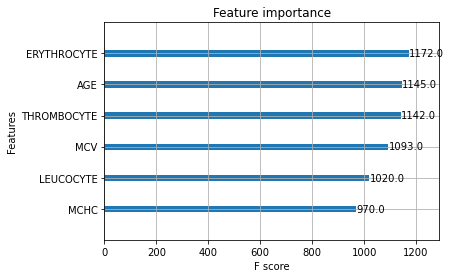

In [111]:
#Feature Importance using xgboost
xgb.plot_importance(gbm)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

### Deep Learning

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [21]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (7,) ))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(Xi, y, epochs=80, batch_size=500, validation_split = .2)

Epoch 1/80
4/4 [==============================] - 0s 20ms/step - loss: 0.4688 - accuracy: 0.7829 - val_loss: 0.5543 - val_accuracy: 0.7328
Epoch 2/80
4/4 [==============================] - 0s 7ms/step - loss: 0.4692 - accuracy: 0.7856 - val_loss: 0.5532 - val_accuracy: 0.7414
Epoch 3/80
4/4 [==============================] - 0s 8ms/step - loss: 0.4667 - accuracy: 0.7878 - val_loss: 0.5521 - val_accuracy: 0.7392
Epoch 4/80
4/4 [==============================] - 0s 7ms/step - loss: 0.4671 - accuracy: 0.7851 - val_loss: 0.5498 - val_accuracy: 0.7414
Epoch 5/80
4/4 [==============================] - 0s 8ms/step - loss: 0.4654 - accuracy: 0.7889 - val_loss: 0.5511 - val_accuracy: 0.7457
Epoch 6/80
4/4 [==============================] - 0s 8ms/step - loss: 0.4647 - accuracy: 0.7900 - val_loss: 0.5510 - val_accuracy: 0.7392
Epoch 7/80
4/4 [==============================] - 0s 8ms/step - loss: 0.4640 - accuracy: 0.7889 - val_loss: 0.5515 - val_accuracy: 0.7392
Epoch 8/80
4/4 [=================

Epoch 60/80
4/4 [==============================] - 0s 5ms/step - loss: 0.4340 - accuracy: 0.8083 - val_loss: 0.5605 - val_accuracy: 0.7392
Epoch 61/80
4/4 [==============================] - 0s 5ms/step - loss: 0.4343 - accuracy: 0.8094 - val_loss: 0.5625 - val_accuracy: 0.7328
Epoch 62/80
4/4 [==============================] - 0s 6ms/step - loss: 0.4336 - accuracy: 0.8045 - val_loss: 0.5634 - val_accuracy: 0.7349
Epoch 63/80
4/4 [==============================] - 0s 7ms/step - loss: 0.4322 - accuracy: 0.8089 - val_loss: 0.5595 - val_accuracy: 0.7371
Epoch 64/80
4/4 [==============================] - 0s 5ms/step - loss: 0.4321 - accuracy: 0.8137 - val_loss: 0.5635 - val_accuracy: 0.7328
Epoch 65/80
4/4 [==============================] - 0s 7ms/step - loss: 0.4318 - accuracy: 0.8078 - val_loss: 0.5644 - val_accuracy: 0.7284
Epoch 66/80
4/4 [==============================] - 0s 5ms/step - loss: 0.4298 - accuracy: 0.8072 - val_loss: 0.5605 - val_accuracy: 0.7263
Epoch 67/80
4/4 [==========

In [27]:
# multilayer perceptron
acuuracy = []
for i in range(1,5):
    Xi = X.copy()
    Xi = scaler_fct(Xi,i)
    clf = MLPClassifier(random_state=1, max_iter=500).fit(Xi, y)
    acuuracy.append(clf.score(Xi, y))
print(acuuracy)
# clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.7879965457685665, 0.7879965457685665, 0.7607944732297064, 0.7508635578583766]


In [32]:
#Grid search MLP classifier
mlp = MLPClassifier(max_iter=500)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.1, 1],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(Xi, y)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=500), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'], 'alpha': [0.1, 1],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [34]:
grid = {'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu']}
clf = GridSearchCV(MLPClassifier(random_state=1, max_iter=5000, hidden_layer_sizes=(3,3), alpha=1e-5), grid, n_jobs=-1, cv=10)
clf.fit(Xi, y)

GridSearchCV(cv=10,
             estimator=MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3),
                                     max_iter=5000, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [35]:
clf.score(Xi,y)

0.7478411053540587

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Xi = X.copy()
# Xi = scaler_fct(Xi,1)
gnb.fit(Xi,yi)
gnb.score(Xi,yi)
# acuuracy = []
# for i in range(1,5):
#     Xi = X.copy()
#     Xi = scaler_fct(Xi,i)
#     gnb.fit(Xi,y)
#     acuuracy.append(gnb.score(Xi, y))
# print(acuuracy)
# print("Number of mislabeled points out of a total %d points : %d"
#        % (Xi.shape[0], (y != y_pred).sum()))

0.7139949109414758

In [70]:
#Naif bayes baggingClassifier
clf = BaggingClassifier(base_estimator=gnb,
                         bootstrap=True, 
                                n_estimators=900,
                                max_samples=500,
                                random_state=500).fit(Xi, yi)
clf.score(Xi,yi)

0.7155216284987277

j'ai essayé avec LinearDiscriminant Analysis ACP mais le problème c'est que la précision diminue

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
X_lda = clf.fit_transform(X, y)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(
X_lda[:,0],
X_lda[:,0],
c=y,
cmap='rainbow',
alpha=0.7,
edgecolors='b'
)

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xi, y)

j'ai pensé d'utiliser semi supervised modèle avec les données entrainement ça va être train +test mais encore la précision donne des valeurs très petite

In [69]:
from sklearn.semi_supervised import LabelPropagation
model = LabelPropagation()
model.fit(X_mixed,y_mixed)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:290: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


LabelPropagation()

In [72]:
# make predictions on hold out test set
yhat = model.predict(X)
# calculate score for test set
score = accuracy_score(y, yhat)

In [74]:
predictions = model.predict(Xt)
deploy2(predictions,X_testtt,'mySubmissionSemisup.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       0  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       0  
4           20.8  29.7  70.0   40    0       0  
5           28.8  32.9  87.5   46    1       0  


In [75]:
from sklearn.semi_supervised import LabelSpreading
model = LabelSpreading()
model.fit(X_mixed,y_mixed)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LabelSpreading()

In [76]:
yhat = model.predict(X)
# calculate score for test set
score = accuracy_score(y, yhat)

In [77]:
print(score)

1.0


In [78]:
predictions = model.predict(Xt)
deploy2(predictions,X_testtt,'mySubmissionSemisup2.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       0  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       0  
4           20.8  29.7  70.0   40    0       0  
5           28.8  32.9  87.5   46    1       0  


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


In [132]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=500, learning_rate=1,
  max_depth=5, random_state=0)
Xi = X.copy()
Xi = scaler_fct(Xi,1)
gbdt.fit(Xi,y)
# acuuracy = []
# for i in range(1,6):
#     print(i)
#     Xi = X.copy()
#     Xi = scaler_fct(Xi,i)
#     gbdt.fit(Xi, y)
#     acuuracy.append(accuracy_score(y, gbdt.predict(Xi)))
# print(acuuracy)
print(accuracy_score(y,gbdt.predict(Xi)))

1.0


In [135]:
Xt = X_testt.copy()
Xt = scaler_fct(Xt,4)
predictions = gbdt.predict(Xt)
deploy2(predictions,X_testtt,'mySubmissiongbdt1.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

            AGE  SEX  SOURCE  
trustii_id                    
1            81    0       0  
2            21    0       0  
3            82    0       0  
4            40    0       0  
5            46    1       0  


In [99]:
#TSNE reduction du dimension
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(Xb)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2185 samples in 0.008s...
[t-SNE] Computed neighbors for 2185 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2185
[t-SNE] Computed conditional probabilities for sample 2000 / 2185
[t-SNE] Computed conditional probabilities for sample 2185 / 2185
[t-SNE] Mean sigma: 8.400645
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.231674
[t-SNE] KL divergence after 300 iterations: 0.712842


Enfin j'ai pensé d'utiliser le voting classifier en utilisant les modèle précédent qui ont une trés bonne précision

In [72]:
from sklearn.ensemble import VotingClassifier
clf1 = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)                                                                          #DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=2)
# clf2 = create_baseline()
clf3 = SVC(C= 10, gamma= 0.1, kernel= 'rbf',probability=True)
clf4 = BaggingClassifier(KNeighborsClassifier(n_neighbors=2),
                                bootstrap=True, 
                                n_estimators=500,
                                max_samples=400,
                                random_state=46)
eclf = VotingClassifier(estimators=[('dt', clf1),  ('knn', clf2),('svc', clf3),('bagging', clf4)],
                        voting='hard', weights=[1, 1,2,1]) #[1, 1, 2,3] #tsne 1, 2,1,2
# Xi = X.copy()
# Xi = scaler_fct(Xi,1)
# Xi[features]= scaler_fct(Xi[features],1)#5
# Xi= scaler_fct(Xi,2)#5

clf1 = clf1.fit(Xi, yi)
clf2 = clf2.fit(Xi, yi)
clf3 = clf3.fit(Xi, yi)
clf4 = clf4.fit(Xi,yi)
eclf = eclf.fit(Xi, yi)
print(accuracy_score(yi,eclf.predict(Xi)))
# acuuracy = []
# for i in range(1,6):
#     print(i)
#     Xi = X.copy()
#     Xi = scaler_fct(Xi,i)
#     clf1 = clf1.fit(Xi, y)
#     clf2 = clf2.fit(Xi, y)
#     clf3 = clf3.fit(Xi, y)
#     clf4 = clf4.fit(Xi,y)
#     eclf = eclf.fit(Xi, y)
#     acuuracy.append(accuracy_score(y,eclf.predict(Xi)))
# print(acuuracy)


[09:11:20] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:11:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:11:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:11:24] WARNING: ..\src\learner

In [58]:
X_w.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  AGE  SEX
0         37.1          12.2         4.16       16.7          299   47    1
1         35.9          12.4         4.12       11.8          152   60    0
2         30.8          11.5         4.05       34.9          523   66    0
3         41.3          13.9         4.54       10.6          284   71    0
4         37.3          11.9         4.00        5.9          196   66    1

In [36]:
X_w = X.copy()
X_w.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)
X_w.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  AGE  SEX
0         37.1          12.2         4.16       16.7          299   47    1
1         35.9          12.4         4.12       11.8          152   60    0
2         30.8          11.5         4.05       34.9          523   66    0
3         41.3          13.9         4.54       10.6          284   71    0
4         37.3          11.9         4.00        5.9          196   66    1

In [39]:
features = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'AGE']

In [135]:
from sklearn.ensemble import VotingClassifier
#clf1 = DecisionTreeClassifier(max_depth=4)
clf1 = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
clf2 = KNeighborsClassifier(n_neighbors=2)
# clf2 = create_baseline()
clf3 = SVC(C= 10, gamma= 0.1, kernel= 'rbf',probability=True)
clf4 = BaggingClassifier(KNeighborsClassifier(n_neighbors=2),
                                bootstrap=True, 
                                n_estimators=500,
                                max_samples=400,
                                random_state=46)
eclf = VotingClassifier(estimators=[('dt', clf1),  ('knn', clf2),('svc', clf3),('bagging', clf4)],
                        voting='hard', weights=[1,1,2,1]) #[1, 1, 2,3] #tsne 1, 2,1,2 XGB /[1,1,2,1]       //**//DECISIONTREE#best hard', weights=[2,1,3,2] #[2,1,2,3
#baderddine
Xi = X_w .copy()
Xi[features]= scaler_fct(Xi[features],1)#5
clf1 = clf1.fit(Xi, y)
clf2 = clf2.fit(Xi, y)
clf3 = clf3.fit(Xi, y)
clf4 = clf4.fit(Xi,y)
eclf = eclf.fit(Xi, y)
print(accuracy_score(y,eclf.predict(Xi)))
# acuuracy = []
# for i in range(1,6):
#     print(i)
#     Xi = X.copy()
#     Xi = scaler_fct(Xi,i)
#     clf1 = clf1.fit(Xi, y)
#     clf2 = clf2.fit(Xi, y)
#     clf3 = clf3.fit(Xi, y)
#     clf4 = clf4.fit(Xi,y)
#     eclf = eclf.fit(Xi, y)
#     acuuracy.append(accuracy_score(y,eclf.predict(Xi)))
# print(acuuracy)


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:44:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:44:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.802245250431779


In [156]:
from sklearn.ensemble import VotingClassifier
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=2)
# clf2 = create_baseline()
clf3 = SVC(C= 10, gamma= 0.1, kernel= 'rbf',probability=True)
clf4 = BaggingClassifier(KNeighborsClassifier(n_neighbors=2),
                                bootstrap=True, 
                                n_estimators=500,
                                max_samples=400,
                                random_state=46)
eclf = VotingClassifier(estimators=[('dt', clf1),  ('knn', clf2),('svc', clf3),('bagging', clf4)],
                        voting='soft', weights=[1,1,3,2]) #[1, 1, 2,3] #tsne 1, 2,1,2 XGB /[1,1,2,1]       //**//DECISIONTREE#best hard', weights=[2,1,3,2] #[2,1,2,3
#baderddine
Xi = X.copy()
Xi[num_features]= scaler_fct(Xi[num_features],5)#5
clf1 = clf1.fit(Xi, y)
clf2 = clf2.fit(Xi, y)
clf3 = clf3.fit(Xi, y)
clf4 = clf4.fit(Xi,y)
eclf = eclf.fit(Xi, y)
print(accuracy_score(y,eclf.predict(Xi)))
# acuuracy = []
# for i in range(1,6):
#     print(i)
#     Xi = X.copy()
#     Xi = scaler_fct(Xi,i)
#     clf1 = clf1.fit(Xi, y)
#     clf2 = clf2.fit(Xi, y)
#     clf3 = clf3.fit(Xi, y)
#     clf4 = clf4.fit(Xi,y)
#     eclf = eclf.fit(Xi, y)
#     acuuracy.append(accuracy_score(y,eclf.predict(Xi)))
# print(acuuracy)

0.8277202072538861


In [160]:
Xt = X_valid.copy()
Xt[num_features] =  scaler_fct(Xt[num_features],1)
# Xt = scaler_fct(X_ica,2)  #2 is good
predictions = eclf.predict(Xt)
deploy2(predictions,X_valid,'baderNY81double6.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       1  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       0  
4           20.8  29.7  70.0   40    0       1  
5           28.8  32.9  87.5   46    1       0  


In [133]:
Xt = X_valid.copy()
Xt.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)
Xt.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

            AGE  SEX  
trustii_id            
1            81    0  
2            21    0  
3            82    0  
4            40    0  
5            46    1

In [158]:
# Xt = X_valid.copy()
Xt[features] =  scaler_fct(Xt[features],1)
# Xt = scaler_fct(X_ica,2)  #2 is good
predictions = eclf.predict(Xt)
deploy2(predictions,X_valid,'baderNYXGB6.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       1  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       0  
4           20.8  29.7  70.0   40    0       1  
5           28.8  32.9  87.5   46    1       0  


In [73]:
predictions = eclf.predict(Xv)
deploy2(predictions,X_valid,'mySubmissionVotingCLassifierQ.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       0  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       0  
4           20.8  29.7  70.0   40    0       0  
5           28.8  32.9  87.5   46    1       0  


In [110]:
Xt = X_valid.copy()
Xt =  scaler_fct(Xt,1)
# Xt = scaler_fct(X_ica,2)  #2 is good
predictions = eclf.predict(Xt)
deploy2(predictions,X_valid,'mySubmissionVotingCLassifier3000.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX  SOURCE  
trustii_id                                      
1           30.0  31.5  95.3   81    0       1  
2           21.7  31.0  70.0   21    0       0  
3           29.7  33.9  87.6   82    0       0  
4           20.8  29.7  70.0   40    0       1  
5           28.8  32.9  87.5   46    1       0  


In [221]:
Xt = X_valid.copy()
Xt[features] = scaler_fct(Xt[features],1)  #2 is good
predictions = eclf.predict(Xt)
deploy2(predictions,X_testtt,'mySubmissionVotingCLassifierNYPCA.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

            AGE  SEX  SOURCE  
trustii_id                    
1            81    0       1  
2            21    0       0  
3            82    0       0  
4            40    0       0  
5            46    1       0  


In [99]:
X.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         37.1          12.2         4.16       16.7          299  29.3  32.9   
1         35.9          12.4         4.12       11.8          152  30.1  34.5   
3         41.3          13.9         4.54       10.6          284  30.6  33.7   
4         37.3          11.9         4.00        5.9          196  29.8  31.9   
5         38.7          12.8         4.22        4.4          204  30.3  33.1   

    MCV  AGE  SEX  
0  89.2   47    1  
1  87.1   60    0  
3  91.0   71    0  
4  93.3   66    1  
5  91.7   64    0

In [35]:
y = X['SOURCE']
X = X.drop(columns = 'SOURCE')
X.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         37.1          12.2         4.16       16.7          299  29.3  32.9   
1         35.9          12.4         4.12       11.8          152  30.1  34.5   
3         41.3          13.9         4.54       10.6          284  30.6  33.7   
4         37.3          11.9         4.00        5.9          196  29.8  31.9   
5         38.7          12.8         4.22        4.4          204  30.3  33.1   

    MCV  AGE  SEX  
0  89.2   47    1  
1  87.1   60    0  
3  91.0   71    0  
4  93.3   66    1  
5  91.7   64    0

In [97]:
model = get_stacking()
model.fit(Xb,y)
print(accuracy_score(y,model.predict(Xb)))

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:04:03] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:04:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:07:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:07:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:07:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:07:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:07:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7533180778032037


In [93]:
# Xt = X_testt.copy()
X_valid[features] = scaler_fct(X_valid[features],1)
predictions =model.predict(X_valid)
deploy2(predictions,X_testtt,'mySubmissionStackingCLassifier02.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

            AGE  SEX  SOURCE  
trustii_id                    
1            81    0       1  
2            21    0       1  
3            82    0       1  
4            40    0       1  
5            46    1       1  


In [9]:
Xb = X.copy()
# Xb.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         37.1          12.2         4.16       16.7          299  29.3  32.9   
1         35.9          12.4         4.12       11.8          152  30.1  34.5   
3         41.3          13.9         4.54       10.6          284  30.6  33.7   
4         37.3          11.9         4.00        5.9          196  29.8  31.9   
5         38.7          12.8         4.22        4.4          204  30.3  33.1   

    MCV  AGE  SEX  
0  89.2   47    1  
1  87.1   60    0  
3  91.0   71    0  
4  93.3   66    1  
5  91.7   64    0

In [10]:
Xb = pd.get_dummies(Xb,columns = ['SEX'])
Xb.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         37.1          12.2         4.16       16.7          299  29.3  32.9   
1         35.9          12.4         4.12       11.8          152  30.1  34.5   
3         41.3          13.9         4.54       10.6          284  30.6  33.7   
4         37.3          11.9         4.00        5.9          196  29.8  31.9   
5         38.7          12.8         4.22        4.4          204  30.3  33.1   

    MCV  AGE  SOURCE  SEX_0  SEX_1  
0  89.2   47       1      0      1  
1  87.1   60       1      1      0  
3  91.0   71       0      1      0  
4  93.3   66       0      0      1  
5  91.7   64       1      1      0

In [36]:
X_valid = pd.get_dummies(X_valid ,columns = ['SEX'])

In [76]:
X_valid.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)

In [11]:
features = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']

In [37]:
X_valid.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

             MCH  MCHC   MCV  AGE  SEX_0  SEX_1  
trustii_id                                       
1           30.0  31.5  95.3   81      1      0  
2           21.7  31.0  70.0   21      1      0  
3           29.7  33.9  87.6   82      1      0  
4           20.8  29.7  70.0   40      1      0  
5           28.8  32.9  87.5   46      0      1

In [61]:
# Binary Classification with Sonar Dataset: Standardized Smaller
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(KerasClassifier(build_fn=create_baseline, epochs=45, batch_size=5, verbose=0), Xi, y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 72.71% (4.59%)


In [179]:
Xt = X_valid.copy()
Xt[features] = scaler_fct(Xt[features],3)
predictions = model.predict_classes(Xt)
deploy2(predictions,X_testtt,'mySubmissionANN12.csv',True)

            HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
trustii_id                                                                   
1                  24.1           7.6         2.53        5.8          248   
2                  42.2          13.1         6.03        7.7          265   
3                  38.3          13.0         4.37        8.4          145   
4                  39.0          11.6         5.57        9.0          353   
5                  37.7          12.4         4.31        9.8          284   

            AGE  SEX  SOURCE  
trustii_id                    
1            81    0       0  
2            21    0       0  
3            82    0       0  
4            40    0       0  
5            46    1       0  


### Conclusion
puisque notre data d'entrainement n'est pas équilbré j'ai pensé d'ajouter des données en utilisant SMOTE approche mais encore on trouvera le même problème la précision diminue,aussi le problème que les samples (données) sont trés proche 